Diabetes is a chronic disease, which occurs when the pancreas does not produce enough insulin, or when the body cannot effectively use the insulin it produces. This leads to an increased concentration of glucose in the blood (hyperglycaemia).
Diabetes is a growing challenge in India with estimated 8.7% diabetic population in the age group of 20 and 70 years. The rising prevalence of diabetes and other noncommunicable diseases is driven by a combination of factors - rapid urbanization, sedentary lifestyles, unhealthy diets, tobacco use, and increasing life expectancy.
With this in mind, we are going to use Machine Learning to help us predict Diabetes.

# Data Mining

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
diabetes = pd.read_csv("C:/Users/SIDDHARTH/desktop/ML and Data Science/Diabetes Classification Project/Diabetes_XTrain.csv")
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,168,88,42,321,38.2,0.787,40,1
1,8,110,76,0,0,27.8,0.237,58,0
2,7,147,76,0,0,39.4,0.257,43,1
3,2,100,66,20,90,32.9,0.867,28,1
4,4,129,86,20,270,35.1,0.231,23,0


In [5]:
print("Dimensions of Diabetes Data: {}".format(diabetes.shape))

Dimensions of Diabetes Data: (576, 9)


In [6]:
print(diabetes.groupby('Outcome').size())

Outcome
0    375
1    201
dtype: int64


“Outcome” is the feature we are going to predict, 0 means No diabetes, 1 means diabetes. Of these 576 data points, 375 are labeled as 0 and 201 as 1.

c:\users\siddharth\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

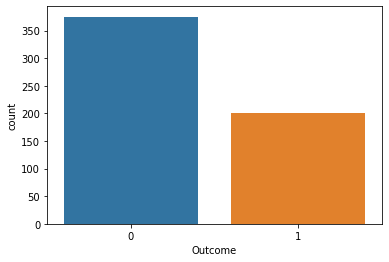

In [7]:
import seaborn as sns
sns.countplot(diabetes['Outcome'],label="Count")

In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               576 non-null    int64  
 1   Glucose                   576 non-null    int64  
 2   BloodPressure             576 non-null    int64  
 3   SkinThickness             576 non-null    int64  
 4   Insulin                   576 non-null    int64  
 5   BMI                       576 non-null    float64
 6   DiabetesPedigreeFunction  576 non-null    float64
 7   Age                       576 non-null    int64  
 8   Outcome                   576 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 40.6 KB


# K-NN Algorithm

The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training data set. To make a prediction for a new data point, the algorithm finds the closest data points in the training data set — its “nearest neighbors.”

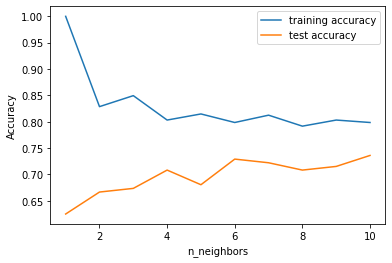

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

The above plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. Considering if we choose one single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the training accuracy drops, indicating that using the single nearest neighbor leads to a model that is too complex. The best performance is somewhere around 9 neighbors.
The plot suggests that we should choose n_neighbors=9. 

In [25]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.72
